In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
data1 = pd.read_csv("All_Data_Morrisons.csv")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [5]:
data1.head(5)


,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Morrisons,2.10,4.20,kg,Alpro Vanilla Yoghurt Alternative,20240413,free-from,False
1,Morrisons,2.10,4.20,kg,Alpro Plain No Sugars Yoghurt Alternative,20240413,free-from,False
2,Morrisons,2.30,2.30,l,Alpro Barista Coconut Milk,20240413,free-from,False
3,Morrisons,3.25,8.13,kg,Morrisons The Best Thick Pork Sausages,20240413,free-from,True
4,Morrisons,3.25,8.67,kg,Morrisons The Best Pork Chipolatas 12 Pack,20240413,free-from,True


In [7]:
# Convert date column to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

# Convert own_brand to boolean
data1['own_brand'] = data1['own_brand'].astype(bool)

In [8]:
# Average prices for own-brand vs non-own-brand products
avg_price_by_brand = data1.groupby('own_brand')['prices_(£)'].mean()
avg_price_per_unit_by_brand = data1.groupby('own_brand')['prices_unit_(£)'].mean()

print("\nAverage price by brand (own-brand vs non-own-brand):")
print(avg_price_by_brand)

print("\nAverage price per unit by brand (own-brand vs non-own-brand):")
print(avg_price_per_unit_by_brand)



Average price by brand (own-brand vs non-own-brand):
own_brand
False    5.309361
True     3.606484
Name: prices_(£), dtype: float64

Average price per unit by brand (own-brand vs non-own-brand):
own_brand
False    31.392266
True      9.986671
Name: prices_unit_(£), dtype: float64


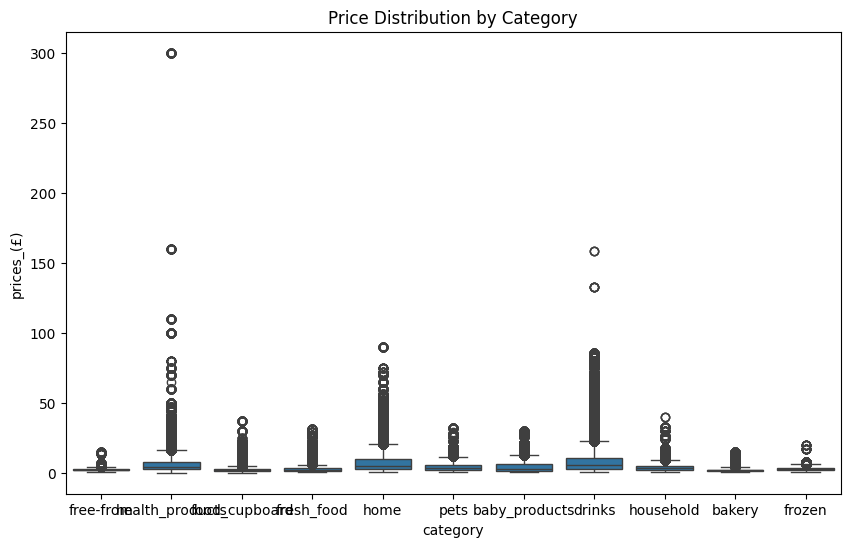

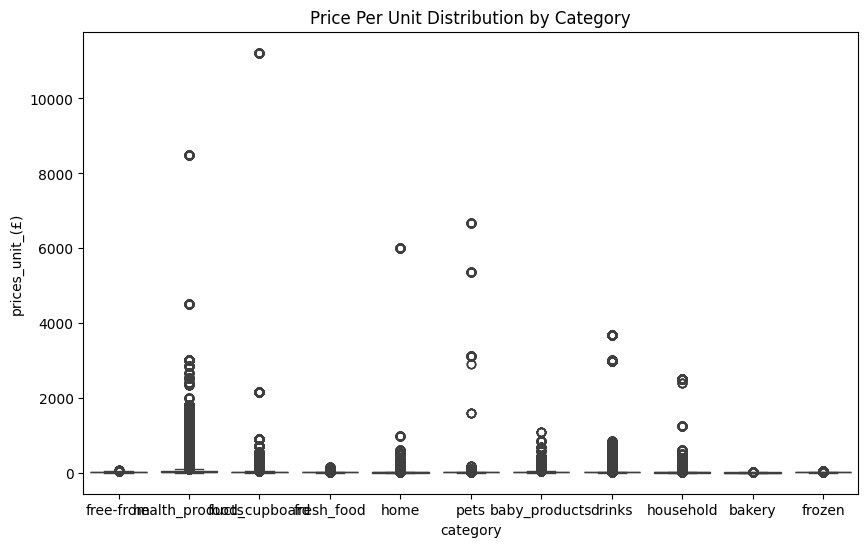

In [9]:
# Price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_(£)')
plt.title('Price Distribution by Category')
plt.show()

# Price per unit distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_unit_(£)')
plt.title('Price Per Unit Distribution by Category')
plt.show()


In [10]:
# Top 5 most expensive products by price
top_5_expensive = data1.nlargest(5, 'prices_(£)')
print("\nTop 5 most expensive products by price:")
print(top_5_expensive[['names', 'prices_(£)']])

# Top 5 least expensive products by price
top_5_cheap = data1.nsmallest(5, 'prices_(£)')
print("\nTop 5 least expensive products by price:")
print(top_5_cheap[['names', 'prices_(£)']])

# Top 5 products by price per unit
top_5_expensive_per_unit = data1.nlargest(5, 'prices_unit_(£)')
print("\nTop 5 most expensive products by price per unit:")
print(top_5_expensive_per_unit[['names', 'prices_unit_(£)']])



Top 5 most expensive products by price:
                                     names  prices_(£)
426323  Oral-B Io Series 6 Ultimate Clean…       300.0
446800  Oral-B Io Series 6 Ultimate Clean…       300.0
468712  Oral-B Io Series 6 Ultimate Clean…       300.0
491040  Oral-B Io Series 6 Ultimate Clean…       300.0
514953  Oral-B Io Series 6 Ultimate Clean…       300.0

Top 5 least expensive products by price:
                                        names  prices_(£)
335582                 Chupa Chups Sugar Free        0.20
443061                   Barratt Chewy Nougat        0.20
9390                           Cadbury Freddo        0.25
9452    Morrisons Savers Creamed Rice Pudding        0.25
21290                          Cadbury Freddo        0.25

Top 5 most expensive products by price per unit:
                              names  prices_unit_(£)
11452  Schwartz Saffron Strands Jar          11225.0
23415  Schwartz Saffron Strands Jar          11225.0
42023  Schwartz Saffron Strand

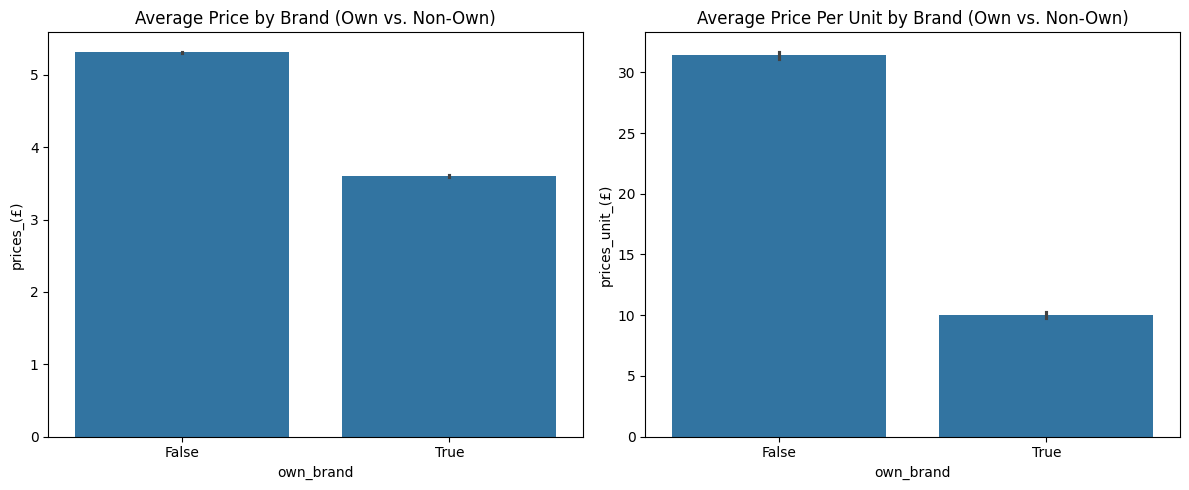

In [11]:
# Visualize average price and price per unit by brand
plt.figure(figsize=(12, 5))

# Average Price by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=data1, x='own_brand', y='prices_(£)')
plt.title('Average Price by Brand (Own vs. Non-Own)')

# Average Price Per Unit by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=data1, x='own_brand', y='prices_unit_(£)')
plt.title('Average Price Per Unit by Brand (Own vs. Non-Own)')

plt.tight_layout()
plt.show()


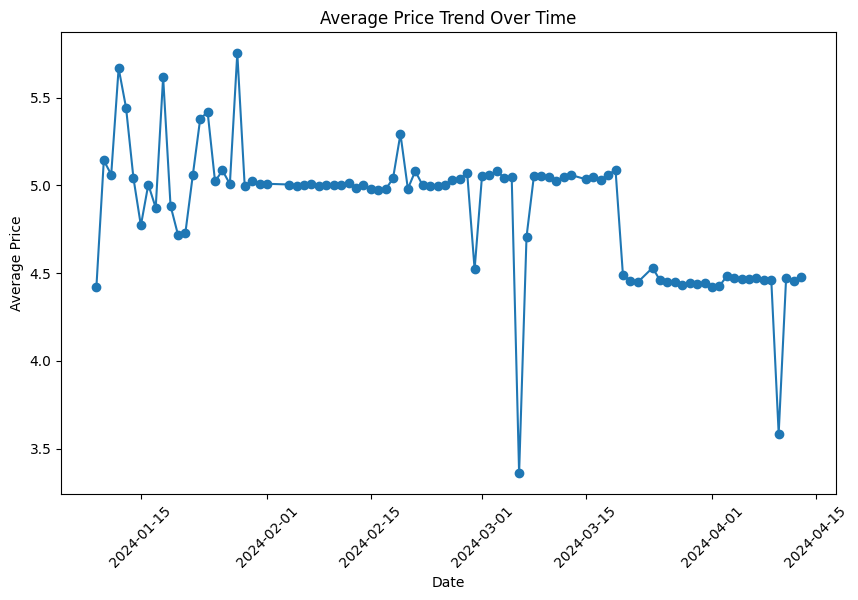

In [12]:
# Average price trend over time (if there are multiple dates)
if data1['date'].nunique() > 1:
    data1_date_trend = data1.groupby('date')['prices_(£)'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(data1_date_trend['date'], data1_date_trend['prices_(£)'], marker='o')
    plt.title('Average Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
def price_range_by_category(data1):
    price_range = data1.groupby('category')['prices_(£)'].agg(lambda x: x.max() - x.min())
    print("\nPrice Range by Category:")
    print(price_range)


In [14]:
def highest_avg_price_by_category(data1):
    avg_price = data1.groupby('category')['prices_(£)'].mean().sort_values(ascending=False)
    print("\nCategories with Highest Average Prices:")
    print(avg_price)


In [15]:
def brand_comparison_count_and_avg_price(data1):
    brand_comparison = data1.groupby('own_brand').agg(
        count=('prices_(£)', 'size'),
        avg_price=('prices_(£)', 'mean')
    )
    print("\nComparison of Own-brand vs. Non-own-brand (Count and Average Price):")
    print(brand_comparison)


In [16]:
def top_3_frequent_categories(data1):
    top_categories = data1['category'].value_counts().nlargest(3)
    print("\nTop 3 Most Frequent Categories:")
    print(top_categories)


In [17]:
price_range_by_category(data1)
highest_avg_price_by_category(data1)
brand_comparison_count_and_avg_price(data1)
top_3_frequent_categories(data1)



Price Range by Category:
category
baby_products       29.60
bakery              14.62
drinks             158.05
food_cupboard       36.79
free-from           14.50
fresh_food          31.13
frozen              19.54
health_products    299.75
home                89.62
household           39.45
pets                31.50
Name: prices_(£), dtype: float64

Categories with Highest Average Prices:
category
drinks             8.639771
home               8.127190
health_products    6.530833
baby_products      4.780193
pets               4.581705
household          4.191330
frozen             2.946959
fresh_food         2.609076
bakery             2.447047
free-from          2.309561
food_cupboard      2.273949
Name: prices_(£), dtype: float64

Comparison of Own-brand vs. Non-own-brand (Count and Average Price):
             count  avg_price
own_brand                    
False      1357322   5.309361
True        436743   3.606484

Top 3 Most Frequent Categories:
category
food_cupboard      4566

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
data1['own_brand'] = data1['own_brand'].astype(int)  # Encode own_brand as 0 or 1
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')  # Convert date if needed

In [20]:
# Define features (X) and target (y)
X = data1[['category', 'supermarket', 'own_brand']]  # You can add more relevant features
y = data1['prices_unit_(£)']  # Target variable

In [21]:
# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['own_brand']),
        ('cat', OneHotEncoder(drop='first'), ['category', 'supermarket'])
    ])

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
}

In [24]:
missing_y = data1['prices_unit_(£)'].isna().sum()
print(f"Missing values in 'prices_unit_': {missing_y}")

Missing values in 'prices_unit_': 110


In [25]:
data1 = data1.dropna(subset=['prices_unit_(£)'])

In [26]:
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

In [27]:
data1['prices_unit_(£)'] = data1['prices_unit_(£)'].fillna(data1['prices_unit_(£)'].mean())

In [28]:
# Check for missing values in 'prices_unit_' column before dropping/filling
print(f"Missing values in 'prices_unit_(£)' before cleaning: {data1['prices_unit_(£)'].isna().sum()}")

# Drop rows where 'prices_unit_' is NaN
data1 = data1.dropna(subset=['prices_unit_(£)'])

# Confirm that there are no missing values in 'prices_unit_'
print(f"Missing values in 'prices_unit_(£)' after cleaning: {data1['prices_unit_(£)'].isna().sum()}")


Missing values in 'prices_unit_(£)' before cleaning: 0
Missing values in 'prices_unit_(£)' after cleaning: 0


In [29]:
# Redefine X and y after cleaning
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models as before
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                         MAE           MSE  R^2 Score
Linear Regression  31.308916  26100.763390   0.016500
Random Forest      30.859105  26066.147060   0.017805
Gradient Boosting  30.845793  26067.239931   0.017763


In [30]:
# Dictionary to store results and predictions
results = {}
predictions = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }
    
    # Store predictions
    predictions[name] = y_pred

# Display model performance comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Show predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,  # Actual test values
    'Linear Regression Prediction': predictions['Linear Regression'],
    'Random Forest Prediction': predictions['Random Forest'],
    'Gradient Boosting Prediction': predictions['Gradient Boosting']
})

# Display the first few predictions for comparison
print("\nSample Predictions Comparison:")
print(predictions_df.head(10))  # Display first 10 predictions for each model



Model Performance Comparison:
                         MAE           MSE  R^2 Score
Linear Regression  31.308916  26100.763390   0.016500
Random Forest      30.859105  26066.147060   0.017805
Gradient Boosting  30.845793  26067.239931   0.017763

Sample Predictions Comparison:
         Actual  Linear Regression Prediction  Random Forest Prediction  \
1695364   12.30                     10.545553                 11.242748   
186279    20.00                     70.828204                 74.209804   
1049178    7.90                      5.417986                  9.614762   
569153     0.74                     34.087532                 35.665801   
671172     4.50                      2.051753                  6.569110   
1228857    8.80                     12.359053                  9.223225   
52993     37.14                     22.496471                 23.087096   
494279    16.67                     25.343045                 28.021329   
1258038   10.00                      5.287625 

In [31]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                         MAE           MSE  R^2 Score
Linear Regression  31.308916  26100.763390   0.016500
Random Forest      30.859105  26066.147060   0.017805
Gradient Boosting  30.845793  26067.239931   0.017763
